In [1]:
from phonon_GF import Phonon
from environment import *
from datetime import datetime
%matplotlib inline

ImportError: No module named 'numba'

In [2]:
def cal_T(n, m, upper_omega, lower_f, upper_f, N=1000, lower_omega=0):
    f_0 = 1.0
    f = [matrix(matrix(uniform(lower_f,upper_f,1))) for i in range(m+1)]
    D_self = matrix([2*f_0])
    D_couple = matrix([-f_0])
    Dl00 = matrix([2*f_0])
    Dl01 = matrix([-f_0])
    Dl11 = matrix([2*f_0])
    Dr00 = matrix([2*f_0])
    Dr01 = matrix([-f_0])
    Dr11 = matrix([2*f_0])
    Dlcl = matrix([-f_0])
    Dlcr = matrix([-f_0])
    D = {'on_site': [D_self for i in range(n-1)] + [f[0] + f_0] + [f[i] + f[i+1] for i in range(m)] + [f[m] + f_0] + [D_self for i in range(n-1)], 
         'lead':{'l': [Dl00, Dl01, Dl11], 'r': [Dr00, Dr01, Dr11]},
         'couple': [D_couple for i in range(n-1)] + [-f[i] for i in range(m+1)] + [D_couple for i in range(n-1)],
         'lead_center':{'l': Dlcl, 'r': Dlcr}}
    omega_range = linspace(lower_omega, upper_omega, N + 1)[1:]
    T = zeros(N)
    for i in range(N):
        omega = omega_range[i]
        system = Phonon(D, omega)
        system.cal_surface_GF()
        system.cal_self_energy()
        system.cal_GF(flag='all')
        system.cal_T()
        T[i] = system.T.real
    fig = plt.figure(1)
    fig.set_size_inches(26, 10)
    plt.plot(omega_range, T, 'ro-')
    return (T, omega_range)

In [3]:
def sigma(T, omega_range, t):
    hbar = 1
    kB = 1
    def bose(omega, t):
        ebar = 1/(e**(-hbar*omega/(kB*t)))
        return (ebar*(hbar*omega)/(kB*t**2))/(ebar-1)**2
    return simps([T[i]*hbar*omega_range[i]*bose(omega_range[i], t) for i in range(len(omega_range))], omega_range)

CPU times: user 11.5 s, sys: 3.33 ms, total: 11.5 s
Wall time: 11.5 s


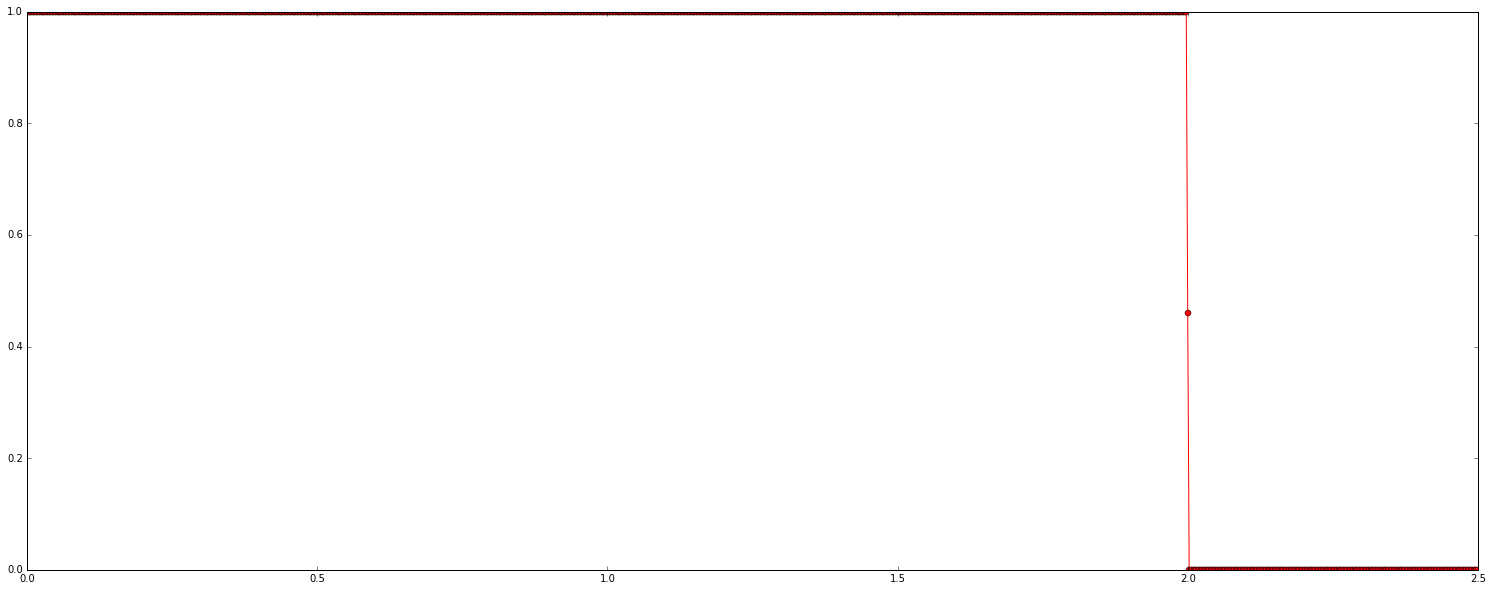

In [4]:
%time transmission = cal_T(10, 10, 2.5, 1.0, 1.0)

In [9]:
sigma(transmission[0], transmission[1], 1.0)

1.7989869151531417

In [30]:
sigma(transmission[0], transmission[1], 0.001)

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in double_scalars
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
/usr/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars


nan

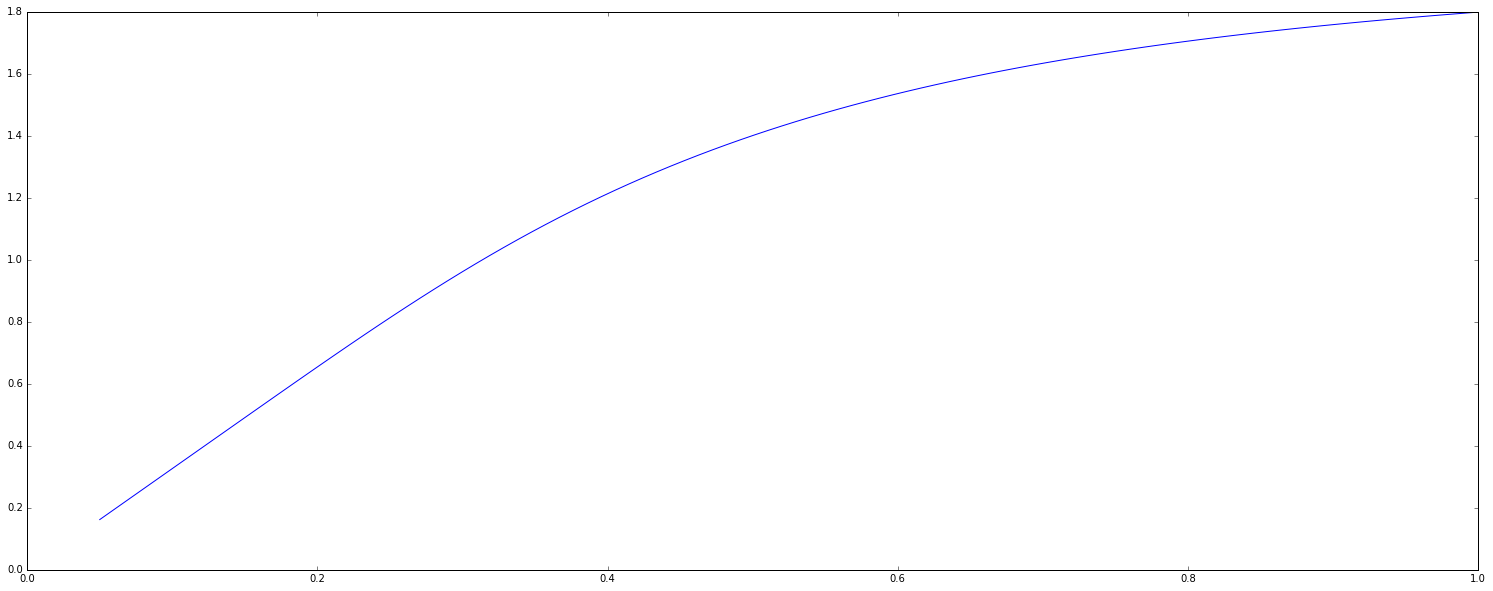

In [17]:
fig = plt.figure(1)
fig.set_size_inches(26, 10)
plt.plot(linspace(0.05,1,100),[sigma(transmission[0], transmission[1], t) for t in linspace(0.05,1,100)])

In [18]:
from numpy import pi

In [19]:
pi

3.141592653589793

In [22]:
e**((1)/(0.001))

OverflowError: (34, 'Numerical result out of range')

In [32]:
1/(e**(-1/0.001))

ZeroDivisionError: float division by zero

In [35]:
e**(-1/0.01)

3.7200759760208555e-44